In [ ]:
filepath = 'C:\\Users\\TheZo\\Desktop\\Future\\JetBrains\\somascan_171_vs_1305.tsv'

In [65]:
import numpy as np

In [66]:
import pandas as pd

In [171]:
from scipy.stats import ttest_ind

In [67]:
 import matplotlib.pyplot as plt

In [68]:
plt.close("all")

In [71]:
df = pd.DataFrame(pd.read_csv(filepath, sep='\t', decimal=",", header=0))

In [72]:
# Sort data by age
df = df.sort_values('Age', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
df

,ID,Age,Sex,Cohort,A2M,ABL1,ABL2,ACAN,ACE2,ACP1,...,XPNPEP1,XRCC6,YES1,YWHAB,YWHAB.YWHAE.YWHAG.YWHAH.YWHAQ.YWHAZ.SFN,YWHAE,YWHAQ,YWHAZ,ZAP70,ZNRF3
141,41,21,Female,Seattle,4.298,2.497,2.902,2.793,2.463,3.095,...,3.610,2.143,2.510,3.812,2.944,3.181,3.072,4.667,3.682,3.551
126,26,22,Female,Seattle,4.338,2.185,3.078,2.965,2.445,3.704,...,4.091,2.353,2.658,4.128,3.218,3.312,2.847,5.020,3.720,2.408
142,42,22,Female,Seattle,4.341,2.952,2.897,2.697,2.352,3.222,...,3.576,2.270,2.534,3.841,2.979,3.232,2.875,4.702,3.761,2.372
107,7,22,Male,Seattle,4.155,2.281,3.062,2.743,2.459,3.112,...,4.213,2.159,2.738,4.382,3.446,3.167,2.958,5.189,3.655,2.466
115,15,23,Male,Seattle,4.161,2.576,3.019,2.694,2.470,3.129,...,4.113,2.181,2.740,4.384,3.475,3.142,2.940,5.222,3.680,2.620
109,9,23,Female,Seattle,4.268,2.240,3.036,2.703,2.491,3.561,...,4.068,2.174,2.654,4.267,3.385,3.223,2.947,5.167,3.575,2.559
155,55,24,Female,Seattle,4.143,2.243,3.006,2.713,2.475,3.950,...,4.051,2.168,2.744,4.311,3.451,3.212,3.020,5.189,3.806,2.409
120,20,25,Male,Seattle,4.063,2.126,2.971,2.671,2.495,3.681,...,4.010,2.150,2.774,4.277,3.347,3.133,2.954,5.252,3.640,2.419
113,13,25,Female,Seattle,4.281,2.344,2.835,2.636,2.620,3.591,...,3.988,2.280,2.677,4.189,3.292,3.601,2.881,5.139,3.597,2.452
124,24,26,Male,Seattle,4.250,2.316,3.059,2.663,2.459,3.419,...,3.842,2.229,2.658,4.028,3.147,3.143,2.900,4.967,3.719,2.492


In [124]:
row_names = df.corr()['Age'].abs().sort_values(ascending=False).nlargest(6).index

Index(['Age', 'GDF15', 'PTN', 'CCDC80', 'EFEMP1', 'MMP12'], dtype='object')

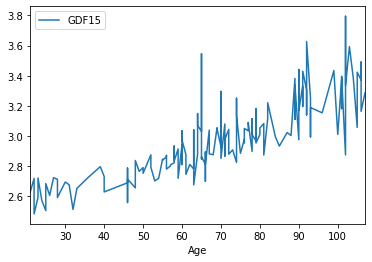

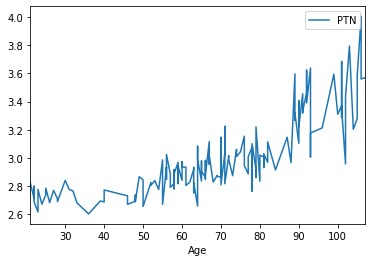

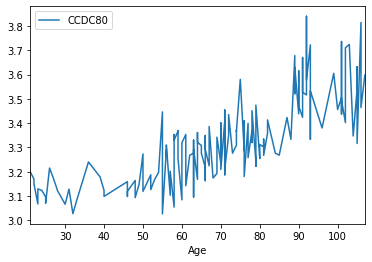

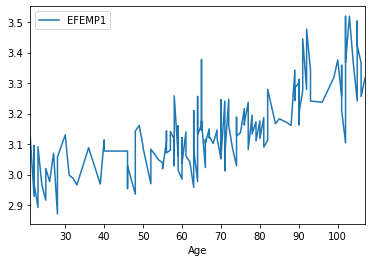

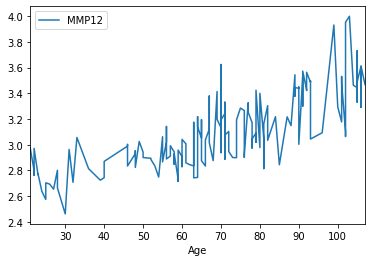

In [188]:
#Find the 5 metrics which correlate to age the best
df.corr()['Age'].abs().sort_values(ascending=False).nlargest(6).index

df.plot(x='Age', y=row_names[1])

df.plot(x='Age', y=row_names[2])
df.plot(x='Age', y=row_names[3])
df.plot(x='Age', y=row_names[4])
df.plot(x='Age', y=row_names[5])


In [186]:
# Group data by age
group_range = 10
df.groupby(pd.cut(df["Age"], np.arange(21, 107+group_range, group_range))).mean()

,ID,Age,A2M,ABL1,ABL2,ACAN,ACE2,ACP1,ACP5,ACVR1B,...,XPNPEP1,XRCC6,YES1,YWHAB,YWHAB.YWHAE.YWHAG.YWHAH.YWHAQ.YWHAZ.SFN,YWHAE,YWHAQ,YWHAZ,ZAP70,ZNRF3
Age,,,,,,,,,,,,,,,,,,,,,
"(21, 31]",2.264286e+01,25.428571,4.211571,2.323429,3.022714,2.706286,2.484214,3.551857,3.696000,2.239143,...,3.996500,2.225714,2.681214,4.185143,3.271571,3.267143,2.928929,5.064929,3.677071,2.481071
"(31, 41]",2.400000e+01,36.666667,4.162833,2.405667,3.026333,2.635667,2.439000,3.176500,3.696667,2.233333,...,4.082500,2.252167,2.722500,4.167500,3.268167,3.219167,2.939833,5.051167,3.701167,2.495000
"(41, 51]",4.350930e+06,47.700000,4.311500,2.232800,2.951400,2.681300,2.470800,3.446900,3.658100,2.320700,...,4.055500,2.249200,2.739200,4.206700,3.288600,3.191100,2.947900,5.050800,3.581500,2.495300
"(51, 61]",1.526277e+07,57.518519,4.199333,2.346148,3.057148,2.670926,2.585926,3.346889,3.747074,2.367852,...,3.903296,2.262667,2.735148,4.131296,3.213889,3.199926,2.969111,4.949889,3.691852,2.623148
"(61, 71]",1.128995e+07,66.918919,4.110622,2.359486,3.069811,2.625811,2.575405,3.418757,3.763378,2.354243,...,3.849568,2.209973,2.746027,4.150946,3.245784,3.097541,2.985892,4.951027,3.713108,2.595730
"(71, 81]",1.078374e+07,77.200000,4.189880,2.304560,3.042520,2.661160,2.549960,3.361760,3.750360,2.340120,...,3.847360,2.204600,2.754240,4.116120,3.213520,3.137520,2.991760,4.947720,3.710080,2.598520
"(81, 91]",4.955762e+08,88.315789,4.144947,2.354737,3.025316,2.657000,2.601211,3.368842,3.714684,2.374632,...,3.872105,2.222000,2.797158,4.253737,3.339947,3.091158,2.997211,5.084526,3.640316,2.553579
"(91, 101]",4.224908e+08,96.214286,4.149429,2.339643,3.083571,2.666143,2.656786,3.396571,3.730214,2.388571,...,3.929429,2.270214,2.866500,4.280286,3.403500,3.141000,2.986714,5.011786,3.714571,2.626714
"(101, 111]",2.055905e+08,103.777778,4.087778,2.366667,3.128667,2.707389,2.559778,3.463611,3.789333,2.374056,...,3.807333,2.268333,2.811500,4.155167,3.328333,3.131167,3.032944,4.865056,3.713000,2.558111


In [187]:
df.groupby(pd.cut(df["Age"], np.arange(21, 107+group_range, group_range))).mean().corr()['Age'].abs().sort_values(ascending=False).nlargest(6)

Age        1.000000
IL18BP     0.995212
GDF15      0.988109
APOL1      0.985596
ADAMTS5    0.985033
REG4       0.982026
Name: Age, dtype: float64

In [176]:
ttest_ind(two_data.loc['cat'], two_data.loc['cat2'], equal_var=False)

TypeError: ttest_ind() takes from 2 to 5 positional arguments but 69 were given